### **Insper  - Acionamentos Elétricos **

**Atividade para a aula 23**

Objetivo: simular o comportamento de um motor DC.

Nesta atividade, vamos simular o comportamento no tempo de um motor elétrico DC. Como acabamos de de ver na aula, a figura abaixo representa o modelo elétrico do motor, assim como a equação diferencial a seguir descreve o comportamento da velocidade angular do motor.

In [37]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

#from IPython.display import Image
#Image(filename="figures/DiagramaMotor.png")

Usando a Lei de Kirchhoff das tensões e a equação mecânica do motor, chegamos a:

$\frac{d^2\omega}{dt^2}=k_1\cdot V_a-k_2\cdot \frac{d\omega}{dt}-k_3\cdot \omega$

Sendo:

$k_1=\frac{k_t}{L\cdot I}$

$k_2=\frac{R\cdot I+L\cdot b}{L\cdot I}$

$k_3=\frac{R\cdot b+k_t\cdot k_e}{L\cdot I}$


Considere os seguintes parâmetros do motor, retirados da tabela de parâmetro do modelo M223X da fabricante CUI INC

$V_a=12\space V$

$R=7,2\space\Omega$

$\omega_{max}=280\pi \space rad/s$

$k_e=0,0132 \space V/rad/s$

$k_t=0,01315 \space Nm/A$

$L=3,4\space\mu H$
 
$I=4,5\cdot 10^{-7} \space kgm^2$


**Item 1:** No manual do motor não havia a constante de arrasto ($b$). Podemos calculá-la? Calcule b e as constantes $k_1$, $k_2$ e $k_3$ na célula abaixo.

In [38]:
#inicialização das variáveis
Va=12
R=7.2
wmax=280*np.pi
ke=0.0132
kt=0.01315
L=3.4e-6
I=4.5e-7

#calcule as constantes e b aqui
k1 = kt/(L*I)
k3 = k1*Va/wmax
b  = ((k3*I*L)-(ke*kt))/R
k2 = (I*R + b*L)/(I * L)

print(f'k1: {k1:.2f}')
print(f'k2: {k2:.2f}')
print(f'k3: {k3:.2f}')
print(f'b: {b:.2e}')

k1: 8594771241.83
k2: 2117648.85
k3: 117248599.53
b: 8.07e-07


**Item 2:** Construa a função da equação diferencial do motor para ser integrada no ODEINT. Em quanto tempo o motor atinge a velocidade máxima? Ela é igual a $280\pi\space rad/s$?
Lembre-se que o momento de inércia que você usou é somente do eixo do próprio motor, ou seja, refletirá o motor partindo sem "carga", ou "em vazio".

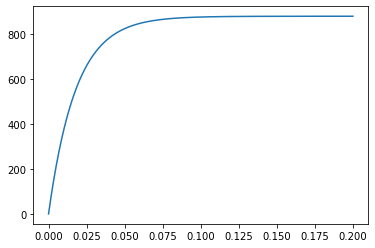

Velocidade máxima - parâmetro: 879.65 rad/s
Velocidade máxima - calculada: 879.63 rad/s


In [39]:
#delta t a ser usado nas simulações
dt = 1e-6
#lista de tempo para a simulação
T = np.arange(0,0.2,dt)
#nossa equação diferencial do motor
def equacaoDiferencial(z, t):
    #escreva aqui a equação diferencial do motor
    w = z[0]
    dwdt = z[1]
    d2wdt2 = k1*Va - k2*dwdt - k3*w

    return[dwdt, d2wdt2]

#condição inicial: o motor parte do repouso, então tanto velocidade como aceleração angular são nulas
Z0 = [0,0]
#rodando o ODEINT
W = odeint(equacaoDiferencial, Z0, T)
#plotando os resultados
plt.plot(T, W[:,0])
# plt.yscale('log')
plt.show()
#cálculo da velocidade máxima do motor
print("Velocidade máxima - parâmetro: %.2f" %wmax, "rad/s")
print("Velocidade máxima - calculada: %.2f" %max(W[:,0]), "rad/s")

**Item 3:** Vamos agora alterar o momento de inércia total para: $I=1\cdot 10^{-5} kg\cdot m^2$. Isso representa uma "carga" mecânica associada ao motor, como quando conectamos uma polia ao seu eixo. O que acontece com a velocidade do motor neste caso?

Lembre-se que você precisará calcular novamente _TODAS_ as constantes do motor ao alterar $I$

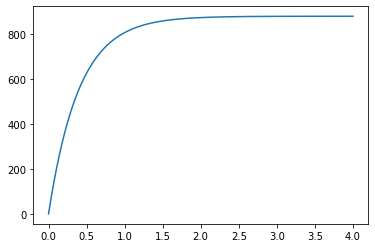

Velocidade máxima - parâmetro: 879.65 rad/s
Velocidade máxima - calculada: 879.60 rad/s


In [41]:
#Vamos alterar o momento de inércia do motor
I=1e-5

#recalcule aqui as constantes do motor
k1 = kt/(L*I)
k3 = k1*Va/wmax
b  = ((k3*I*L)-(ke*kt))/R
k2 = (I*R + b*L)/(I * L)





#vamos alterar nossa lista de tempo para 4s de valor máximo
T=np.arange(0,4,dt)
#vamos rodar novamente o ODEINT
W=odeint(equacaoDiferencial, Z0, T)
#e plotar a solução
plt.plot(T, W[:,0])
plt.show()
#cálculo da velocidade máxima do motor
print("Velocidade máxima - parâmetro: %.2f" %wmax, "rad/s")
print("Velocidade máxima - calculada: %.2f" %max(W[:,0]), "rad/s")

**Item 4:** Altere agora o valor da tensão de alimentação do motor ($Va$) para 6V. Atenção, não vamos recalcular os parâmetros do motor neste caso, pois a tensão paramétrica do motor continua sendo 12V. 

O que acontece? Qual a relação entre a velocidade máxima paramétrica e a que você obteve a partir da simulação?

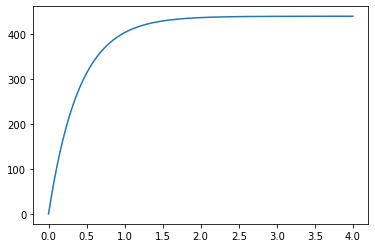

Velocidade máxima - parâmetro: 879.65 rad/s
Velocidade máxima - calculada: 439.80 rad/s


In [43]:
#implemente seu código aqui
Va = 6

W=odeint(equacaoDiferencial, Z0, T)
#e plotar a solução
plt.plot(T, W[:,0])
plt.show()
#cálculo da velocidade máxima do motor
print("Velocidade máxima - parâmetro: %.2f" %wmax, "rad/s")
print("Velocidade máxima - calculada: %.2f" %max(W[:,0]), "rad/s")


**Item 5:** Por fim, vamos fazer uma série de simulações para obter a relação entre tensão de entrada e a velocidade máxima do motor. Qual seria a velocidade máxima do motor para vários valores diferentes de tensão? Observe atentamente o código abaixo, que plota um gráfico com tensão no eixo das abscissas e a velocidade máxima final no eixo das ordenadas.

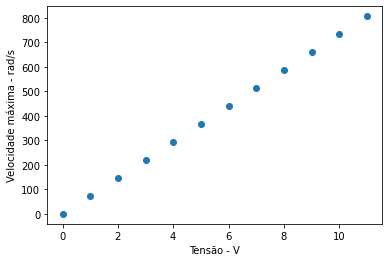

In [44]:
#lista de tensões iniciais
listaVa=np.arange(0,12,1)

#lista com velocidades máximas finais
Wmax=[]
for v in listaVa:
    #para cada tensão
    Va=v
    #rodamos o ODEINT
    W=odeint(equacaoDiferencial, Z0, T)
    #e guardamos o valor da velocidade máxima
    Wmax.append(max(W[:,0]))
#vamos plotar os resultados    
plt.plot(listaVa, Wmax, "o")
plt.xlabel("Tensão - V")
plt.ylabel("Velocidade máxima - rad/s")
plt.show()


**Item 6:** Vamos agora gerar um sinal de tensão $Va$ PWM. Para isso, vamos simular matematicamente um sinal PWM e usar a mesma equação diferencial que utilizamos até aqui para compreender o que acontece com o motor. Acompanhe o código abaixo com cuidado e tente compreender o que estamos fazendo.

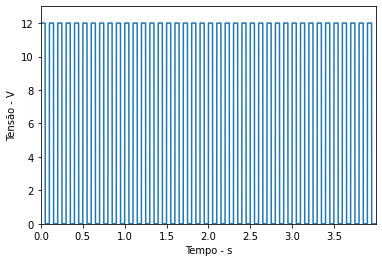

In [45]:
#vamos definir o período do nosso sinal PWM
f=10
periodo=1/f
#definimos agora o dutyCicle
dutyCicle=0.5
#Vamos implementar uma função que retorna um sinal PWM gerado matematicamente
def Va_PWM(t):
    if t%periodo > dutyCicle*periodo:
        saida=0
    else:
        saida=12
    return saida

#vamos usar nossa lista de tempo para 4s de valor máximo
T=np.arange(0,4,dt)

#lista de tensões
V=[]
for t in T:
    V.append(Va_PWM(t))
    
plt.plot(T, V)
plt.axis([0,max(T), 0, 13])
plt.xlabel("Tempo - s")
plt.ylabel("Tensão - V")
plt.show()

**Item 7:** Agora que você compreendeu que o item anterior gera um sinal de tensão PWM de 12V, acompanhe o código abaixo e tente entender o que estamos fazendo. Em primeiro lugar, trocamos a tensão constante $Va$ por um sinal PWM de frequência definida no item anterior. Com base no nosso código:

a) Rode tudo como está. Tente explicar o que você está vendo!

b) Volte à célula do item 6 e altere a frequência para 100Hz. Rode novamente ambas as células e tente explicar o que está acontencendo.

c) Se definirmos a amplitude da variação da velocidade angular do motor como nosso sinal de saída, e a amplitude da tensão de entrada como nosso sinal de entrada, podemos dizer que o motor funciona como um filtro passa alta ou passa baixa?

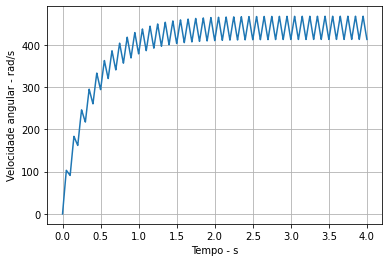

Velocidade máxima - parâmetro: 879.65 rad/s
Velocidade máxima - calculada: 467.16 rad/s


In [46]:

def equacaoDiferencialPWM(Z, t):
    w=Z[0]
    dwdt=Z[1]
    dw2dt2=k1*Va_PWM(t)-k2*dwdt-k3*w    
    return[dwdt, dw2dt2]

#vamos rodar o ODEINT com a nova equação diferencial
W=odeint(equacaoDiferencialPWM, Z0, T)
#plotando os resultados
plt.plot(T, W[:,0])
plt.xlabel("Tempo - s")
plt.ylabel("Velocidade angular - rad/s")
plt.grid(True)
plt.show()

#cálculo da velocidade máxima do motor
print("Velocidade máxima - parâmetro: %.2f" %wmax, "rad/s")
print("Velocidade máxima - calculada: %.2f" %max(W[:,0]), "rad/s")